In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_analysis.utils import business
from data.paths.parquet_paths import BUSINESS

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)

In [107]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [108]:
business_df.isna().sum()

name                          10000
address                       10000
city                          10000
state                         10000
postal_code                   10000
latitude                      10000
longitude                     10000
stars                         10000
review_count                  10000
is_open                       10000
categories                    10000
hours                         12284
AcceptsInsurance              19587
AgesAllowed                   19992
Alcohol                       17633
Ambience                      17490
BYOB                          19962
BYOBCorkage                   19927
BestNights                    19749
BikeParking                   15815
BusinessAcceptsBitcoin        19192
BusinessAcceptsCreditCards    14159
BusinessParking               14623
ByAppointmentOnly             17173
Caters                        17952
CoatCheck                     19792
Corkage                       19948
DietaryRestrictions         

### Variables - helpers

In [109]:
name = 'name'
address = 'address'
city = 'city'
state = 'state'
postal_code = 'postal_code'
latitude = 'latitude'
longitude = 'longitude'
stars = 'stars'
review_count = 'review_count'
is_open = 'is_open'
categories = 'categories'
hours = 'hours'
AcceptsInsurance = 'AcceptsInsurance'
AgesAllowed = 'AgesAllowed'
Alcohol = 'Alcohol'
Ambience = 'Ambience'
BYOB = 'BYOB'
BYOBCorkage = 'BYOBCorkage'
BestNights = 'BestNights'
BikeParking = 'BikeParking'
BusinessAcceptsBitcoin = 'BusinessAcceptsBitcoin'
BusinessAcceptsCreditCards = 'BusinessAcceptsCreditCards'
BusinessParking = 'BusinessParking'
ByAppointmentOnly = 'ByAppointmentOnly'
Caters = 'Caters'
CoatCheck = 'CoatCheck'
Corkage = 'Corkage'
DietaryRestrictions = 'DietaryRestrictions'
DogsAllowed = 'DogsAllowed'
DriveThru = 'DriveThru'
GoodForDancing = 'GoodForDancing'
GoodForKids = 'GoodForKids'
GoodForMeal = 'GoodForMeal'
HairSpecializesIn = 'HairSpecializesIn'
HappyHour = 'HappyHour'
HasTV = 'HasTV'
Music = 'Music'
NoiseLevel = 'NoiseLevel'
Open24Hours = 'Open24Hours'
OutdoorSeating = 'OutdoorSeating'
RestaurantsAttire = 'RestaurantsAttire'
RestaurantsCounterService = 'RestaurantsCounterService'
RestaurantsDelivery = 'RestaurantsDelivery'
RestaurantsGoodForGroups = 'RestaurantsGoodForGroups'
RestaurantsPriceRange2 = 'RestaurantsPriceRange2'
RestaurantsReservations = 'RestaurantsReservations'
RestaurantsTableService = 'RestaurantsTableService'
RestaurantsTakeOut = 'RestaurantsTakeOut'
Smoking = 'Smoking'
WheelchairAccessible = 'WheelchairAccessible'
WiFi = 'WiFi'

In [110]:
business_df[[stars, review_count]].describe()

,stars,review_count
count,10000.00000,10000.000000
mean,3.55045,35.067600
std,1.01852,103.118055
min,1.00000,3.000000
25%,3.00000,4.000000
50%,3.50000,9.000000
75%,4.50000,26.000000
max,5.00000,4138.000000


In [111]:
business_df.sample(3)

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
ER2ghPBTyKBn7L2bBZ_nlA,Georgia Hardy Tours Inc.,20 Eglinton Avenue W,Toronto,ON,M4R 1K8,43.706940,-79.398621,3.5,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,True,None,None,True,True,True,None,True,free
ciP8LxrF-VNRbIg21udE_w,Jasons' Barber Shop,"135 E Erie St, Ste 201",Kent,OH,44240,41.152725,-81.357559,3.5,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


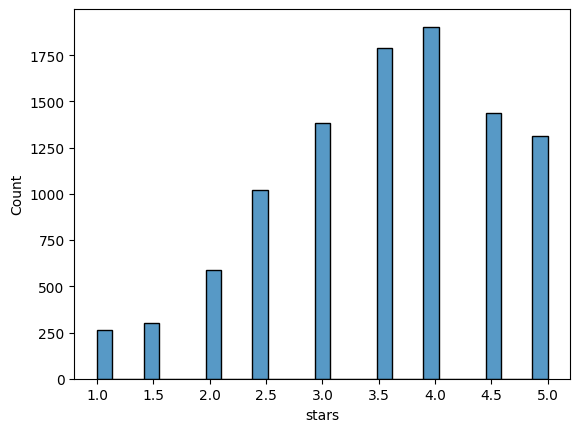

In [112]:
sns.histplot(data=business_df, x=stars)
plt.show()

review_count_median=9.0


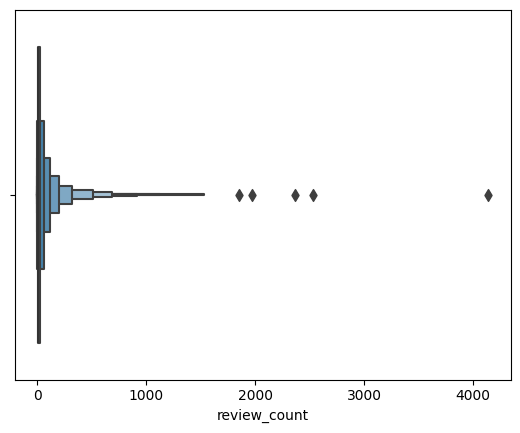

In [113]:
review_count_median = business_df[review_count].median()
print(f"{review_count_median=}")

sns.boxenplot(data=business_df, x=review_count)
plt.show()

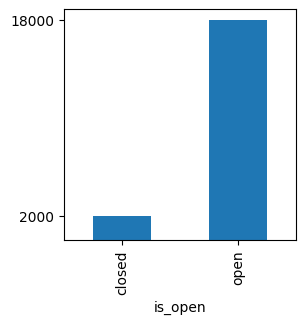

In [114]:
business_df[is_open] = business_df[is_open].apply(lambda x: 'open' if x else 'closed')

y = business_df.groupby(is_open)[is_open].count().values.tolist()
fig, ax = plt.subplots(figsize=(3, 3))
business_df.groupby(is_open)[is_open].count().plot(kind='bar', ax=ax).set_yticks(y)
plt.show()

In [115]:
from data.paths.parquet_paths import CHECKIN
checkin_df = pd.read_parquet(str(CHECKIN))

In [116]:
verifying_threshold = 10
business_df['not_verified'] = business_df[review_count].transform(lambda x:
    (x < verifying_threshold))

print(business_df['not_verified'].sample(10))

mzkEN4Bw2LUJfApVAFhRkA     True
-IMbvKYt8ZxayUzfMgDVeA     True
9147                      False
1122                      False
5650                      False
51dPP8pXmlqRwID41MNA6A    False
4439                      False
5311                      False
3666                      False
6551                      False
Name: not_verified, dtype: bool


In [117]:
from datetime import datetime, timedelta

business_and_checkin = business_df.join(checkin_df, rsuffix='_checkin')
business_and_checkin['date'] = business_and_checkin['date'].dropna().apply(lambda x: x[0])
business_and_checkin['date'] = pd.to_datetime(business_and_checkin['date'])

youth_threshold = timedelta(days=365)
dataset_date = business_and_checkin['date'].max()

business_df['young'] = business_and_checkin['date'].transform(lambda x:
   None if x is None else dataset_date - x < youth_threshold)

print(business_df['young'].sample(10))

7051                      False
9588                      False
7161                      False
Pnw5K6dsMh6Zn_q2qcpnnA    False
9de0HpyAgKZ0ltEOo3p6YA    False
3503                      False
7991                      False
4020                      False
7175                      False
Z0c9-Eoxz7SQ__68bl3TQw    False
Name: young, dtype: bool


In [118]:
# unpopular bussiness - little reviews, no checkins in last year (?)
# dying bussiness - was popular, unpopular now

# timeline will be divided into bins
# state of each business in each bin period must be calculated independently
# then unpopulars are last bin low-runners
# and populars are unpopulars with some really popular periods

# activities_df 
# index | bussiness_id | type | date
checkin_to_series = pd.Series(checkin_df['date'].to_numpy(), 
                              index=checkin_df['business_id'].to_numpy())
checkin_flat = checkin_to_series.apply(pd.Series).stack()
checkin_flat = checkin_flat.reset_index(level=[0])


In [243]:
checkin_flat['type'] = 'checkin'
checkin_flat.columns = ['business_id', 'date', 'type']
checkin_flat['date'] = pd.to_datetime(checkin_flat['date'])
checkin_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167733 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   business_id  1167733 non-null  object        
 1   date         1167733 non-null  datetime64[ns]
 2   type         1167733 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 67.9+ MB


In [244]:
from data.paths.parquet_paths import REVIEW
review_df = pd.read_parquet(str(REVIEW))

review_cut = review_df[['business_id', 'date']].copy()
review_cut['date'] = pd.to_datetime(review_cut['date'])
review_cut['type'] = 'review'
review_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   business_id  100000 non-null  object        
 1   date         100000 non-null  datetime64[ns]
 2   type         100000 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [245]:
activity_df = pd.concat([checkin_flat, review_cut])
activity_df = activity_df.sort_values(by='date')
activity_df.sample(10)

,business_id,date,type
14,1zd7jxpJXmNygpe7AK18wg,2012-08-20 20:26:06,checkin
1712,1N0NhvtN1JmPlozjuY_QfQ,2015-09-27 22:53:14,checkin
9,-7VzJ1aG5yuWB9LT42yhlw,2013-03-24 20:03:14,checkin
1731,2c9Vptks_vowLgVUMnCgjw,2014-03-16 19:01:43,checkin
4039,0jAexNHRHhkQv4zNYqenBA,2015-08-15 06:13:54,checkin
1345,19S0gFtg5GTX6CkiApJiAQ,2016-10-07 22:30:50,checkin
265,1rULAY9Q_mfZIZtPhgqnmw,2014-05-24 23:24:38,checkin
3517,1ZnVfS-qP19upP_fwOhZsA,2017-06-17 03:11:29,checkin
2937,1d6c6Q2j2jwVzBfX_dLHlg,2018-05-15 18:28:12,checkin
619,0v8icS8wOOgEDiHDCOQkZQ,2018-12-30 23:15:55,checkin


In [246]:
bin_count = 56 # 14 years of polling, bin for each year quarter

activity_df['date_bin'] = pd.cut(activity_df['date'], bins = bin_count, labels = range(bin_count))
activity_df.sample(10)

,business_id,date,type,date_bin
32,27_N5P9HZ86IviONPT_twg,2011-06-25 01:07:55,checkin,24
29127,ULAz5fw2r3vm0N-_FTMzGg,2016-12-20 00:00:00,review,44
14,02BXFKzu1rgaYulNGYvi6g,2012-06-17 19:43:34,checkin,27
888,24eTPqdGHu9QtAmpYKp-yg,2018-09-19 19:16:12,checkin,51
630,-bd4BQcl1ekgo7avaFngIw,2015-10-31 16:27:52,checkin,40
1906,-BxWyEIQ6wypT-37MzZizQ,2018-07-22 01:47:57,checkin,50
19,-mmxNfHRs1DxRRQvAChAfg,2014-07-10 20:49:25,checkin,35
422,01fuY2NNscttoTxOYbuZXw,2012-02-28 16:18:12,checkin,26
1805,1wiv2BvvauMj8hS16UuEYw,2018-02-26 00:39:37,checkin,49
10958,2gHJ-csflxzezLAi6JQW0w,2015-02-04 00:00:00,review,37


In [247]:
# need count of activities for each date bin groupby(bussiness_id, bin)
activity_binned = activity_df.copy()
activity_binned = activity_binned.drop(['date'], axis=1)
activity_binned = activity_binned.groupby(['business_id', 'date_bin', 'type']).size().reset_index(name='count')

activity_binned['checkins'] = activity_binned.apply(lambda x: x[3] if x[2] == 'checkin' else 0, axis=1)
activity_binned['reviews'] = activity_binned.apply(lambda x: x[3] if x[2] == 'review' else 0, axis=1)
activity_binned = activity_binned.drop(['type', 'count'], axis = 1)

activity_binned.groupby(['business_id', 'date_bin']).sum().reset_index()

,business_id,date_bin,checkins,reviews
0,--1UhMGODdWsrMastO9DZw,0,0,0
1,--1UhMGODdWsrMastO9DZw,1,0,0
2,--1UhMGODdWsrMastO9DZw,2,0,0
3,--1UhMGODdWsrMastO9DZw,3,0,0
4,--1UhMGODdWsrMastO9DZw,4,0,0
...,...,...,...,...
1248179,zzwhN7x37nyjP0ZM8oiHmw,51,0,0
1248180,zzwhN7x37nyjP0ZM8oiHmw,52,0,0
1248181,zzwhN7x37nyjP0ZM8oiHmw,53,0,0
1248182,zzwhN7x37nyjP0ZM8oiHmw,54,0,0


In [274]:
# business_id | checkins | reviews
last_bin_activity = activity_binned[activity_binned.date_bin == bin_count - 1]

unpopular_checkins, unpopular_reviews = 0, 3

unpopular_bussinesses = (last_bin_activity[last_bin_activity.checkins <= unpopular_checkins]
                                          [last_bin_activity.reviews <= unpopular_reviews]
                        .drop(['date_bin'], axis=1)
)

unpopular_bussinesses

C:\Users\strel\AppData\Local\Temp\ipykernel_2552\204921919.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unpopular_bussinesses = (last_bin_activity[last_bin_activity.checkins <= unpopular_checkins]


,business_id,checkins,reviews
110,--1UhMGODdWsrMastO9DZw,0,0
111,--1UhMGODdWsrMastO9DZw,0,0
223,--6MefnULPED_I942VcFNA,0,0
335,--7zmmkVg-IMGaXbuVd0SQ,0,0
446,--8LPVSo5i0Oo61X01sV9A,0,0
...,...,...,...
2496143,zzlZJVkEhOzR2tJOLHcF2A,0,0
2496254,zzuOCWxuY39YJ1wnTwQ0Lg,0,0
2496255,zzuOCWxuY39YJ1wnTwQ0Lg,0,0
2496366,zzwhN7x37nyjP0ZM8oiHmw,0,0


In [275]:
popular_checkins, popular_reviews = 2, 5

oncepopular_businesses = (activity_binned[activity_binned.checkins >= popular_checkins]
                                         [activity_binned.reviews >= popular_reviews]
                          .drop(['date_bin'], axis=1))

oncepopular_businesses

C:\Users\strel\AppData\Local\Temp\ipykernel_2552\2631117677.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oncepopular_businesses = (activity_binned[activity_binned.checkins >= popular_checkins]


,business_id,checkins,reviews


In [276]:
dying_businesses = pd.merge(unpopular_bussinesses, oncepopular_businesses)
dying_businesses

,business_id,checkins,reviews
